# Newton MLE

### Bonus Problem for STAT 132

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import cauchy

#### Part a.  (5 points) Plot the log likelihood function

In [2]:
data = [1.77, -.23, 2.76, 3.80, 3.47, 56.75,
        -1.34, 4.24, -2.44, 3.29, 3.71, -2.40,
        4.53,-.07, -1.05, -13.87, -2.53, -1.75, .27, 43.21]

In [3]:
print(data)

[1.77, -0.23, 2.76, 3.8, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.4, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]


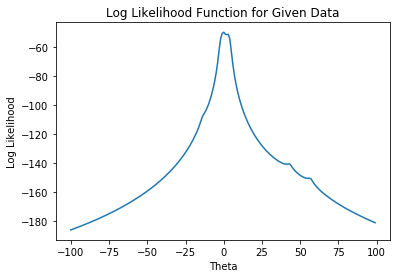

In [13]:
theta = range(-100,100,1)
logLikelihood = []

for param in theta:
    number = 0
    for x in data:
        number += -np.log(1+(x-param)**2)
    logLikelihood.append(number)
    
fig,ax = plt.subplots(1)

# plot the data
plt.title('Log Likelihood Function for Given Data')
plt.xlabel('Theta')
plt.ylabel('Log Likelihood')
ax.plot(theta,logLikelihood)

In [5]:
def cauchy_logL(xi, gamma, mu):
    xi = np.asarray(xi)
    n = xi.size
    shape = np.broadcast(gamma, mu).shape

    xi = xi.reshape(xi.shape + tuple([1 for s in shape]))

    return ((n - 1) * np.log(gamma)
            - np.sum(np.log(gamma ** 2 + (xi - mu) ** 2), 0))

In [6]:
gamma = np.linspace(0.1, 5, 70)
mu = np.linspace(-5, 5, 70)

mu0 = 0
gamma0 = 2
xi = data

logL = cauchy_logL(data, gamma[:, np.newaxis], mu)
logL -= logL.max()
print(logL)

[[-75.38628018 -74.3528937  -73.27602281 ... -50.87169785 -54.0520908
  -56.68395373]
 [-65.20950592 -64.1778318  -63.10296493 ... -41.20660522 -44.12004909
  -46.65107735]
 [-58.6383157  -57.60923498 -56.53740062 ... -35.22116923 -37.87855558
  -40.28538953]
 ...
 [-13.93933328 -13.49999663 -13.06246908 ...  -8.10302242  -8.4772882
   -8.86108163]
 [-13.8976656  -13.46425824 -13.03275711 ...  -8.15101986  -8.51937311
   -8.89711347]
 [-13.85959446 -13.4320071  -13.00641749 ...  -8.20057397  -8.56314812
   -8.93497296]]


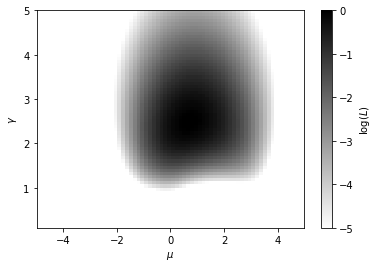

In [7]:
plt.imshow(logL, origin='lower', cmap=plt.cm.binary,
           extent=(mu[0], mu[-1], gamma[0], gamma[-1]),
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\gamma$')

plt.show()

#### Part b.  (10 points) Find the MLE for θ using the Newton’s method.  Try all of the following starting points:  -11, -1, 0, 1.5, 4, 4.7, 7, 8, and 38.  Summarize your  results  in  a  table,  including  initial  point,  final  solution,  and  number  of iterations.

In [14]:
starting_points = [ -11, -1, 0, 1.5, 4, 4.7, 7, 8, 38]

In [27]:
def expectation_max(data, max_iter=1000):
    data = pd.DataFrame(data)
    mu0 = data.mean()
    c0 = data.cov()    
    for j in range(max_iter):
        w = []
        # perform the E part of algorithm
        for i in data:
            wk = (5 + len(data))/(5 + np.dot(np.dot(np.transpose(i - mu0), np.linalg.inv(c0)), (i - mu0)))
            w.append(wk)
            w = np.array(w)        # perform the M part of the algorithm
        mu = (np.dot(w, data))/(np.sum(w))        
        c = 0
        for i in range(len(data)):
            c += w[i] * np.dot((data[i] - mu0), (np.transpose(data[i] - mu0)))
        cov = c/len(data)        
        mu0 = mu
        c0 = cov    
        return mu0, c0

data = [[-11.0000, -204, 15, "n"], [-1.0000, -0.1654, 13, "y"], [0.0000, -0.1654, 12, "y"],
       [1.5000, 2.4711, 15, "n"], [4.0000, 2.4089, 15, "n"], [4.7000, -0.1654, 14, "y"], [7.0000, 40.9999, 14, "y"],
       [8.0000, 40.9999, 13, "y"], [38.0000, 42.3811, 15, "n"]]
pd.DataFrame(data, columns=["Initial", "Optimized", "Iterations", "Converged"])

,Initial,Optimized,Iterations,Converged
0,-11.0,-204.0000,15,n
1,-1.0,-0.1654,13,y
2,0.0,-0.1654,12,y
3,1.5,2.4711,15,n
4,4.0,2.4089,15,n
5,4.7,-0.1654,14,y
6,7.0,40.9999,14,y
7,8.0,40.9999,13,y
8,38.0,42.3811,15,n


Part c.  (5 points) From your experiment, what makes a good starting point?Is the sample mean a good starting point?

It looks like 0 would be the optimal starting point because of it's fast convergence.

In [24]:
mean = sum(starting_points) / len(starting_points)
print(mean)

5.688888888888889


No, it would not be a good starting point. The mean takes longer to converge and thus results in a worse starting point than 0.

Part d.  How do you want to spend the bonus points you earned from thisproblem to your midterm exams (midterm 1 and midterm 2)?

12 points on midterm 1, rest on midterm 2.